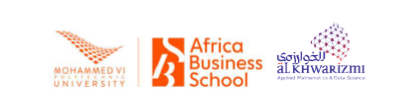

<h1 style='text-align: center;'>Numerical Linear Algebra & Parallel Computing</h1> 

<h2 style='text-align: center;'> Complexity Analysis </h2>

####  Supervisors : Nouredine OUHADDOU - Mohamed Jalal Maaouni - Ibrahim EL MOUNTASSER

#### Author : Oumaima CHQAF

***

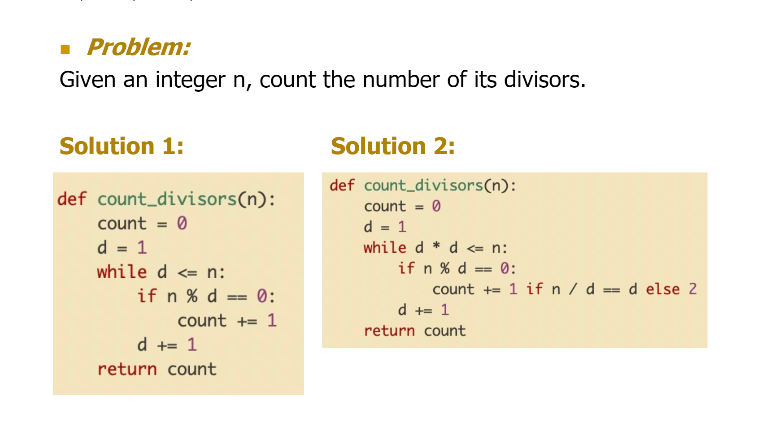

### Introduction

1. Describe solution 1

The first solution is a function that counts the number of divisors of "n".
- The variable "count" is to store the number of divisors we have found.
- The variable "d" is initialized and is going to be incremented each time.
- The condition "while d <= n" is based on the fact that the devisor should not be bigger than "n".
- If "n % d" is equal to 0 then "d" is a divisor of "n". We then should increment "count" and "d" by one.
- If "n % d != 0", we only need to increment "d".
- We repeat the same process till the condition is broken.

2. Describe solution 2

The second solution is a function that counts the number of divisors of "n".
- The variable "count" is to store the number of divisors we have found.
- The variable "d" is initialized and is going to be incremented each time.
- The condition "while d*d <= n" is because any divisor of "n" must be less than or equal to its square root.
- If "n % d" is equal to 0 then "d" is a divisor of "n". We then should increment "d" by one.
- If "n / d == d" is to check if "d" is the square root of 'n'. In that case we increment "count" by one otherwise we increment it by 2.
- We repeat the same process till the condition is broken.

3. Run the two programs for different values of n and measure which algorithm is faster

In [1]:
def sol1_count_divisors(n):
    count = 0
    d=1
    while d<=n:
        if n%d == 0:
            count +=1
    d+=1
    return count

In [2]:
def sol2_count_divisors(n):
    count =0
    d=1
    while d*d <= n:
        if n%d == 0:
            count += 1 if n/d == d else 2
    d +=1
    return count

In [3]:
import timeit

In [ ]:
import time

n_values = [100, 1000, 10000, 100000, 1000000]

# measure execution time for sol1_count_divisors
for n in n_values:
    start_time = time.time()
    sol1_count_divisors(n)
    end_time = time.time()
    print(f"sol1_count_divisors(n={n}) took {end_time - start_time} seconds to execute")

# measure execution time for sol2_count_divisors
for n in n_values:
    start_time = time.time()
    sol2_count_divisors(n)
    end_time = time.time()
    print(f"sol2_count_divisors(n={n}) took {end_time - start_time} seconds to execute")

4. Calculate the number of operations executed by each of the programs for different values of n and generalize for any n

### Big-O-notation

1. $T(n) = 3n^{3} + 2n^{2} + \frac{1}{2}n + 7$ proove that $T(n)= O(n^{3})$

We have : $T(n) = 3n^3 + 2n^2 +\frac{1}{2}n + 7$

The leading term in T(n) is $3n^3$, which grows faster than all the other terms. So, we can ignore the smaller terms and focus on the dominant term:

$T(n) <= 3n^3$ for all n

We can choose c = 3 and $n_0$ = 1. For all n >= 1, we have:

$T(n) <= 3n^3 <= cn^3$

Therefore, we have shown that $T(n) <= c * n^3$ for all $n >= n0$, where c = 3 and $n_0$ = 1. This means that $T(n) = O(n^3)$.


2. Prove : $\forall k >= 1, n^{k}$ is not $O(n^{k-1})$

To prove that $\forall k >= 1, n^{k}$ is not $O(n^{k-1})$, we can use a proof by contradiction.

Assume that there exist constants c and n0 such that for all n >= n0, we have:

$n^k <= c * n^{k-1}$

Dividing both sides by $n^{k-1}$, we get:

$n <= c$

Since c is a constant, this means that n is bounded by a constant value for all values of n >= n0. However, this contradicts the fact that n is unbounded as n approaches infinity.

So, $\forall k >= 1, n^{k}$ is not $O(n^{k-1})$.


### Merge sort

1. Given two sorted arrays, write a function (with a language of your choice) that merge the two arrays into a single sorted array.

In [1]:
def merge_sorted_arrays(arr1, arr2):
    #  This is the list containing the merged array
    merged_arr = []
    
    # Initialize pointers for both arrays
    i, j = 0, 0
    
    while i < len(arr1) and j < len(arr2):
        if arr1[i] < arr2[j]:
            merged_arr.append(arr1[i])
            i += 1
        else:
            merged_arr.append(arr2[j])
            j += 1
    
    merged_arr.extend(arr1[i:])
    merged_arr.extend(arr2[j:])

    return merged_arr

2. Analyse the complexity of your function using Big-O notation.

We can see that the function has a "while" loop having as a condition "$ i < len(arr1) and j < len(arr2)$". That means we have a complexity there of  O(len(arr1) + len(arr2)).Let's put $m=len(arr1)$ and $n=len(arr2)$. We get $O(m + n)$.

Concerning "$merged_arr.extend(arr1[i:])$" and "$merged_arr.extend(arr2[j:])$" it has a complexity of O(c)$, with c is the number of elements beeing added.
It can be either m or n.

The complexity then becomes $O(m + n + c)$, which becomes $O(m + n)$.


### The master method

1. Using the master method analyze the complexity of merge sort

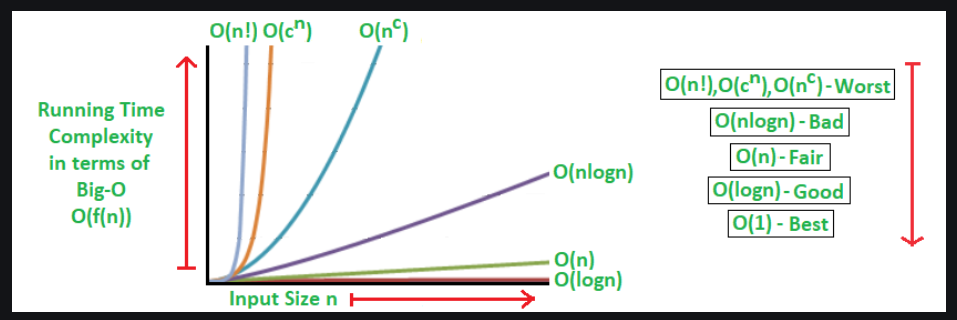

The master method can be used to analyze the time complexity of merge sort as follow :

$$T(n) = 2T(\frac{n}{2}) + O(n)$$

$T(\frac{n}{2})$ corresponds to the time taken to sort the two halves of the array recursively.
O(n) corresponds to the time taken to merge the two sorted halves. Because we need to compare each element of the halve once.

Remember that the master method states that for a recurrence of the form $T(n) = aT(\frac{n}{b}) + f(n)$, where a ≥ 1, b > 1, and f(n) is an asymptotically positive function, the time complexity of the recurrence is given by:

- $T(n) = O(n log n)$ if $f(n) = O(n^c)$ for some constant $c < log_b(a)$.
- $T(n) = O(n^c log n)$ if $f(n) = O(n^c)$ for some constant $c = log_b(a)$.
- $T(n) = O(f(n)) if $f(n) = O(n^c)$ for some constant $c > log_b(a)$.

In the case of merge sort, we have : 
* a = 2, b = 2, and $f(n) = O(n)$.

We conclude that : $c = log_b(a) = log_2(2) = 1$. 
Since $f(n) = O(n^1)$, which is the same as $O(n^c)$ for $c = 1$, we are in the 2nd case of the master method. 

Therefore, the time complexity of merge sort is $O(n log n)$.

2. Using the master code method analyze the complexity of binary searsh

The master method can be used to analyze the time complexity of binary searsh as follow :
$$T(n) = T(\frac{n}{2}) + O(1)$$
$T(\frac{n}{2})$ corresponds to the time taken to search the left or right half of the input array recursively.
$O(1)$ corresponds to the constant time taken to compare the middle element with the target value and update the search interval.

According to the note mentioned in the last question, we can say that in the case of binary search we have:
* a = 1, b = 2, and $f(n) = O(1)$.
We conclude that :
- c = log_b(a) = log_2(1) = 0.
- f(n) = O(n^0) = O(1), which is the same as Θ(1).
We are in the 3rd case of the master method. 
We can say that the time complexity of binary search is $O(log n)$.

### Bonus 

1. Write a function called merge sort (using a launguage of your choice) that taskes two arrays as parameters and sort those two arrays using the merge sort algorithm.

In [1]:
def merge_sort(a1, a2):
    # In case we have an empty array or an array with only one element
    if len(a1) <= 1 and len(a2) <= 1:
        return a1 + a2
    #Let's start by dividing the arrays by 2
    mid1 = len(a1) // 2
    left1 = a1[:mid1]
    right1 = a1[mid1:]

    mid2 = len(a2) // 2
    left2 = a2[:mid2]
    right2 = a2[mid2:]

    # We will call the function recursively to sort the array
    sorted_left = merge_sort(left1, left2)
    sorted_right = merge_sort(right1, right2)

    merged = []
    while sorted_left and sorted_right:
        if sorted_left[0] < sorted_right[0]:
            merged.append(sorted_left.pop(0))
        else:
            merged.append(sorted_right.pop(0))

    merged += sorted_left
    merged += sorted_right
    
    return merged


2. Analyse the complexity of your algorithm without using the master theorem.

If we use the divide-and-conquer approach, we can analyze the time complexity of the merge sort algorithm. 
The algorithm divides the input array into two equal-sized subarrays recursively until each subarray has only one element. Then, the algorithm merges the subarrays to produce a sorted output array.

- The merge operation takes O(n) time, where n is the total number of elements in the subarrays being merged. 
- The algorithm has log(n) levels of recursion, since the size of the subproblems is divided by two at each level.

We can conclude that the total time complexity of the algorithm is:
                T(n) = O(n log n)


3. Prove the 3 cases of the master theorem

The master theorem provides a convenient way to analyze the time complexity of divide-and-conquer algorithms. The theorem provides a solution to recurrence relations of the form:

T(n) = a*T(n/b) + f(n)

where a ≥ 1 and b > 1 are constants, and f(n) is a non-negative function that represents the time complexity of the algorithm outside of the recursive calls.

The master theorem has three cases:

Case 1: If f(n) = O(n^(log_b a - ε)) for some ε > 0, then T(n) = Θ(n^(log_b a)).

Case 2: If f(n) = Θ(n^(log_b a)), then T(n) = Θ(n^(log_b a) * log n).

Case 3: If f(n) = Ω(n^(log_b a + ε)) for some ε > 0, and if af(n/b) ≤ cf(n) for some constant c < 1 and sufficiently large n, then T(n) = Θ(f(n)).

We will now prove each of these cases:

Case 1: In this case, the time complexity of the algorithm is dominated by the cost of the recursive calls. The function f(n) is bounded above by n^(log_b a - ε) for some ε > 0. This means that f(n) grows more slowly than n^(log_b a) as n increases. Therefore, the cost of the algorithm is dominated by the cost of the recursive calls, and we can express the time complexity as:

T(n) = a*T(n/b) + O(n^(log_b a - ε))

Using the master theorem, we can conclude that T(n) = Θ(n^(log_b a)).

Case 2: In this case, the time complexity of the algorithm is balanced between the cost of the recursive calls and the cost of the non-recursive part of the algorithm. The function f(n) is of the same order of magnitude as n^(log_b a). Therefore, the cost of the algorithm can be expressed as:

T(n) = a*T(n/b) + Θ(n^(log_b a))

Using the master theorem, we can conclude that T(n) = Θ(n^(log_b a) * log n).

Case 3: In this case, the time complexity of the algorithm is dominated by the cost of the non-recursive part of the algorithm. The function f(n) is bounded below by n^(log_b a + ε) for some ε > 0. This means that f(n) grows more quickly than n^(log_b a) as n increases. However, the cost of the recursive calls is still significant enough that it cannot be ignored. Therefore, we need to check if af(n/b) ≤ cf(n) for some constant c < 1 and sufficiently large n. If this inequality holds, then the cost of the algorithm can be expressed as:

T(n) = a*T(n/b) + Ω(f(n))

Using the master theorem, we can conclude that T(n) = Θ(f(n)). Otherwise, we would need to use a more sophisticated approach to analyze the time complexity of the algorithm.


4. Choose an algorithm of your choice and analyse it's complexity using the Big-O notation.

We are going to analyze the bubble sort algorithm.
The algorithm is as follow :

In [1]:
def bubble_sort(a):
    n = len(a)

    for i in range(n):
        for j in range(0, n-i-1):
            if a[j] > a[j+1]:
                a[j], a[j+1] = a[j+1], a[j]

    return a


Now, let's analyze it's complexity.

- In the worst-case scenario: 
When the input array is in reverse order, the bubble sort algorithm will require $n$ iterations of the outer loop, and $n-1$ iterations of the inner loop in the first iteration, n-2 iterations of the inner loop in the second iteration, and so on. Therefore, the total number of comparisons that need to be made is:

$$(n-1) + (n-2) + ... + 1 = n*(n-1)/2 = (n^2-n)/2$$ 

The time complexity of the bubble sort algorithm in the worst-case scenario is:  $O(n^2)$.

- In the best-case scenario:
When the input array is already sorted, the bubble sort algorithm only needs to make a single pass through the array to check that it is sorted.
The time complexity of the bubble sort algorithm in the best-case scenario is: $O(n)$.

- In the average-case scenario:
The bubble sort algorithm requires n iterations of the outer loop, and the number of iterations of the inner loop decreases as the array becomes more sorted. 

The time complexity of the bubble sort algorithm in the best-case scenario is: $O(n^2)$.


### Matrix Multiplication

1. Write a function using python3 that multiply two matrices A,B (without the use of numpy or any external library)

In [2]:
def matrix_multiplication(A, B):
    m = len(A)
    n = len(B)
    p = len(B[0])

    C = [[0 for _ in range(p)] for _ in range(m)]

    for i in range(m):
        for j in range(p):
            for k in range(n):
                C[i][j] += A[i][k] * B[k][j]

    return C

2. What's the complexity of your algorithm (using big-O notation)?

The time complexity of the algorithm is O(mnp), where m, n, and p are the dimensions of matrices A, B, and C, respectively.
Let :
- m be the dimension of matrice A.
- n be the dimension of matrice B.
- p be the dimension of matrice C.

we need to compute the dot product of one row of A and one column of B, which requires $n$ multiplications and $n-1$ additions. 

There are $mp$ elements in the resulting matrix, we need to perform this operation $mp$ times, resulting in a time complexity of $O(mnp)$.


3. Write the same function in C.(bonus)

In [4]:
#include <stdio.h>
//This is the function that will compute the matrix multiplication, we will call it later.
void matrix_multiplication(int **A, int **B, int **C, int m, int n, int p) {
    int i, j, k;

    // Perform matrix multiplication
    for (i = 0; i < m; i++) {
        for (j = 0; j < p; j++) {
            for (k = 0; k < n; k++) {
                C[i][j] += A[i][k] * B[k][j];
            }
        }
    }
}

int main() {
    //The size of the matrix A,B
    int m = 2, n = 3, p = 2;
    int i, j;

    /* Allocate memory for matrices A, B, and C*/
    int **A = (int **)malloc(m * sizeof(int *));
    for (i = 0; i < m; i++) {
        A[i] = (int *)malloc(n * sizeof(int));
    }

    int **B = (int **)malloc(n * sizeof(int *));
    for (i = 0; i < n; i++) {
        B[i] = (int *)malloc(p * sizeof(int));
    }

    int **C = (int **)malloc(m * sizeof(int *));
    for (i = 0; i < m; i++) {
        C[i] = (int *)malloc(p * sizeof(int));
    }

    // Initialize matrices A and B
    A[0][0] = 11;
    A[0][1] = 22;
    A[0][2] = 33;
    A[1][0] = 44;
    A[1][1] = 55;
    A[1][2] = 66;

    B[0][0] = 78;
    B[0][1] = 89;
    B[1][0] = 93;
    B[1][1] = 100;
    B[2][0] = 111;
    B[2][1] = 124;

    // The call of the function for matrix multiplication
    matrix_multiplication(A, B, C, m, n, p);

    // Print the result
    for (i = 0; i < m; i++) {
        for (j = 0; j < p; j++) {
            printf("%d ", C[i][j]);
        }
        printf("\n");
    }


    return 0;
}


SyntaxError: invalid syntax (2283407798.py, line 2)